In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/HindenBerg_Report.csv')

In [6]:
df.head()

# Define tweet cleaning function
def clean_tweet(tweet):
    # Clean tweet text by removing links, special characters, etc.
    return ' '.join(re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[RT]', ' ', str(tweet).lower()).split())

In [7]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,clean_tweet
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,u let this jha2 read carefully drafted legal d...
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,yes and like rg bashed adani modi should also ...
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,pallavighosh ji so has spoken on hindenberg re...
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,with so much venom being spewed by congress dy...
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,hindenberg is banned by sec from participating...


In [8]:
# Define sentiment analysis function
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [9]:
# Apply sentiment analysis function to the dataset
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets,clean_tweet,Sentiment
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0,u let this jha2 read carefully drafted legal d...,Positive
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0,yes and like rg bashed adani modi should also ...,Neutral
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0,pallavighosh ji so has spoken on hindenberg re...,Neutral
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0,with so much venom being spewed by congress dy...,Positive
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0,hindenberg is banned by sec from participating...,Negative


In [10]:
# Print an example of the original, cleaned tweet and its sentiment
n = 15
print("Original tweet:\n", df['Tweets'][n])
print()
print("Clean tweet:\n", df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n", df['Sentiment'][n])


Original tweet:
 7/ Companies must meet specific eligibility and valuation criteria to be a part of these indices.✅

However, after the Hindenberg report, Adani Group's valuation degraded rapidly. So, many speculated that it would no longer be a part of these indices‼️

Clean tweet:
 7 companies must meet specific eligibility and valuation criteria to be a part of these indices however after the hindenberg report adani group s valuation degraded rapidly so many speculated that it would no longer be a part of these indices

Sentiment of the tweet:
 Positive


In [11]:
# Count the total positive, negative, and neutral tweets
print("Total Positive Tweets: {}".format(len(df[df["Sentiment"] == "Positive"])))
print("Total Negative Tweets: {}".format(len(df[df["Sentiment"] == "Negative"])))
print("Total Neutral Tweets: {}".format(len(df[df["Sentiment"] == "Neutral"])))

Total Positive Tweets: 377
Total Negative Tweets: 214
Total Neutral Tweets: 411


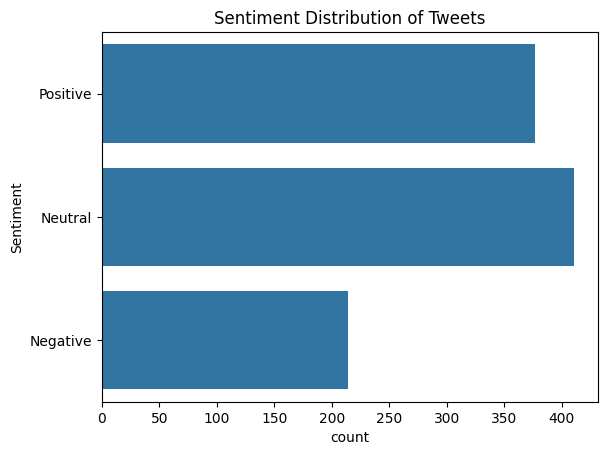

In [12]:
# Visualize the distribution of sentiments
sns.countplot(df["Sentiment"])
plt.title("Sentiment Distribution of Tweets")
plt.show()


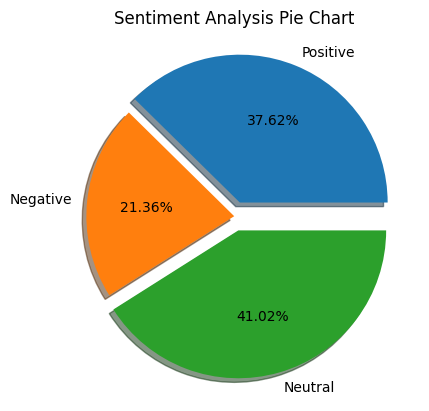

In [13]:
# Pie chart for sentiment distribution
a = len(df[df["Sentiment"] == "Positive"])
b = len(df[df["Sentiment"] == "Negative"])
c = len(df[df["Sentiment"] == "Neutral"])
d = np.array([a, b, c])
explode = (0.1, 0.0, 0.1)
plt.pie(d, shadow=True, explode=explode, labels=["Positive", "Negative", "Neutral"], autopct='%1.2f%%')
plt.title("Sentiment Analysis Pie Chart")
plt.show()

In [14]:
# Prepare the data for model training
X = df['clean_tweet']
y = df['Sentiment']

In [15]:
# Split the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


In [16]:
# Vectorization
cv = CountVectorizer(min_df=1, max_df=1, binary=False, ngram_range=(1, 3))  # Adjust min_df
tv = TfidfVectorizer(min_df=1, max_df=1, use_idf=True, ngram_range=(1, 3))  # Adjust min_df

In [17]:
# Transform the tweets using BOW and TFIDF
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

In [18]:
tv_train = tv.fit_transform(X_train)
tv_test = tv.transform(X_test)


In [19]:
# Train and evaluate Logistic Regression model
lr = LogisticRegression(max_iter=500)
lr.fit(cv_train, y_train)
lr_cv_predict = lr.predict(cv_test)
print("Logistic Regression with BOW Accuracy:", accuracy_score(y_test, lr_cv_predict))

Logistic Regression with BOW Accuracy: 0.40594059405940597


In [20]:
lr.fit(tv_train, y_train)
lr_tfidf_predict = lr.predict(tv_test)
print("Logistic Regression with TFIDF Accuracy:", accuracy_score(y_test, lr_tfidf_predict))


Logistic Regression with TFIDF Accuracy: 0.4158415841584158


In [21]:
# Train and evaluate Naive Bayes model
mnb = MultinomialNB()
mnb.fit(cv_train, y_train)
mnb_cv_predict = mnb.predict(cv_test)
print("Naive Bayes with BOW Accuracy:", accuracy_score(y_test, mnb_cv_predict))

Naive Bayes with BOW Accuracy: 0.44554455445544555


In [22]:
mnb.fit(tv_train, y_train)
mnb_tfidf_predict = mnb.predict(tv_test)
print("Naive Bayes with TFIDF Accuracy:", accuracy_score(y_test, mnb_tfidf_predict))

Naive Bayes with TFIDF Accuracy: 0.40594059405940597


In [23]:
# Train and evaluate Support Vector Classifier model
svc = SVC()
svc.fit(cv_train, y_train)
svc_cv_predict = svc.predict(cv_test)
print("SVC with BOW Accuracy:", accuracy_score(y_test, svc_cv_predict))

SVC with BOW Accuracy: 0.40594059405940597


In [24]:
svc.fit(tv_train, y_train)
svc_tfidf_predict = svc.predict(tv_test)
print("SVC with TFIDF Accuracy:", accuracy_score(y_test, svc_tfidf_predict))

SVC with TFIDF Accuracy: 0.40594059405940597


In [25]:
# Print classification reports
print("\nLogistic Regression Classification Report (BOW):")
print(classification_report(y_test, lr_cv_predict))




Logistic Regression Classification Report (BOW):
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.39      1.00      0.57        39
    Positive       0.00      0.00      0.00        40

    accuracy                           0.41       101
   macro avg       0.46      0.36      0.24       101
weighted avg       0.37      0.41      0.25       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
print("\nLogistic Regression Classification Report (TFIDF):")
print(classification_report(y_test, lr_tfidf_predict))


Logistic Regression Classification Report (TFIDF):
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.43      0.95      0.59        39
    Positive       0.23      0.07      0.11        40

    accuracy                           0.42       101
   macro avg       0.55      0.37      0.29       101
weighted avg       0.48      0.42      0.31       101



In [27]:
print("\nNaive Bayes Classification Report (BOW):")
print(classification_report(y_test, mnb_cv_predict))


Naive Bayes Classification Report (BOW):
              precision    recall  f1-score   support

    Negative       0.26      0.27      0.27        22
     Neutral       0.58      0.67      0.62        39
    Positive       0.39      0.33      0.36        40

    accuracy                           0.45       101
   macro avg       0.41      0.42      0.41       101
weighted avg       0.44      0.45      0.44       101



In [28]:
print("\nNaive Bayes Classification Report (TFIDF):")
print(classification_report(y_test, mnb_tfidf_predict))



Naive Bayes Classification Report (TFIDF):
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.42      0.85      0.56        39
    Positive       0.29      0.15      0.20        40

    accuracy                           0.41       101
   macro avg       0.57      0.36      0.31       101
weighted avg       0.49      0.41      0.33       101



In [29]:
print("\nSVC Classification Report (BOW):")
print(classification_report(y_test, svc_cv_predict))



SVC Classification Report (BOW):
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.39      1.00      0.57        39
    Positive       0.00      0.00      0.00        40

    accuracy                           0.41       101
   macro avg       0.46      0.36      0.24       101
weighted avg       0.37      0.41      0.25       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
print("\nSVC Classification Report (TFIDF):")
print(classification_report(y_test, svc_tfidf_predict))


SVC Classification Report (TFIDF):
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.39      1.00      0.57        39
    Positive       0.00      0.00      0.00        40

    accuracy                           0.41       101
   macro avg       0.46      0.36      0.24       101
weighted avg       0.37      0.41      0.25       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# WordCloud visualization
all_words = ' '.join([text for text in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=STOPWORDS).generate(all_words)

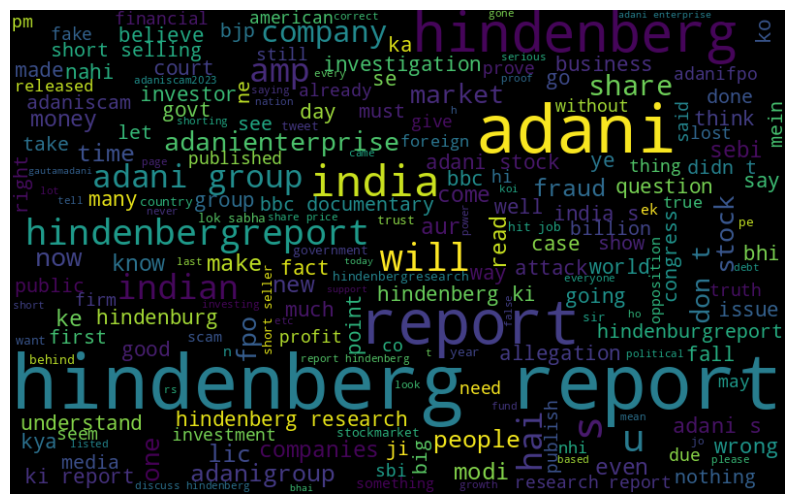

In [32]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()